


> 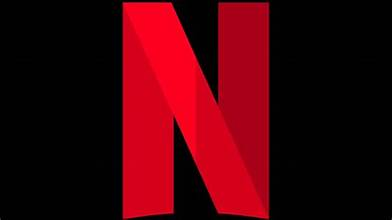





## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Importing The Dataset

In [2]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

#Basic Analysis

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.shape

(8807, 12)

# Un Nesting the columns

In [7]:
#Putting the comma seperated strings into a list
df['listed_in']=df['listed_in'].str.split(',')

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [9]:
# Creating a copy of unnested column
df_unnested=df.explode('listed_in').reset_index(drop=True)

In [10]:
df_unnested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19323 non-null  object
 1   type          19323 non-null  object
 2   title         19323 non-null  object
 3   director      13439 non-null  object
 4   cast          17819 non-null  object
 5   country       17601 non-null  object
 6   date_added    19303 non-null  object
 7   release_year  19323 non-null  int64 
 8   rating        19317 non-null  object
 9   duration      19320 non-null  object
 10  listed_in     19323 non-null  object
 11  description   19323 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


## Handling Null Value of Unnested dataframe


In [11]:
(df_unnested.isna().sum()/len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        66.810492
cast            17.077325
country         19.552629
date_added       0.227092
release_year     0.000000
rating           0.068128
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [12]:
df_unnested['director']=df_unnested['director'].fillna('unknown director')
df_unnested['country']=df_unnested['country'].fillna('unknown country')
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [13]:
df_unnested.isna().sum()

show_id            0
type               0
title              0
director           0
cast            1504
country            0
date_added        20
release_year       0
rating             6
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df_unnested.dropna(inplace=True,axis=0,subset=['date_added','rating'])

In [15]:
df_unnested.isna().sum()

show_id            0
type               0
title              0
director           0
cast            1504
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
df_unnested['cast']=df_unnested['cast'].fillna('unknown cast')

In [17]:
df_unnested.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [18]:
df_unnested.dropna(inplace=True,axis=0,subset=['duration'])

In [19]:
df_unnested.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#More Unnesting: The Cast column

In [20]:
#unnested the cast column
df_unnested['cast']=df_unnested['cast'].str.split(',')
df_cast=df_unnested.explode('cast').reset_index(drop=True)

In [21]:
df_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [22]:
df_cast.shape

(149284, 12)

## Null Value Treatment on the original Dataframe

In [23]:
## Deleting the showid
df.drop(columns=['show_id'],inplace=True)

In [24]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [25]:
#Percentage of null values present in each column
(df.isnull().sum()/len(df))*100

type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [26]:
df['director']=df['director'].fillna('unknown director')
df['country']=df['country'].fillna('unknown country')
df['rating']=df['rating'].fillna('unknown rating')
df['duration']=df['duration'].fillna('unknown duration')

df.isnull().sum()
df.dropna(subset=['date_added'],inplace=True)

In [27]:
df.isnull().sum()

type              0
title             0
director          0
cast            825
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [28]:
df.drop('cast',inplace=True,axis=1)

# Data Exploration

In [29]:
df['country'].value_counts()

country
United States                             2812
India                                      972
unknown country                            830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [30]:
df['rating'].value_counts()

rating
TV-MA             3205
TV-14             2157
TV-PG              861
R                  799
PG-13              490
TV-Y7              333
TV-Y               306
PG                 287
TV-G               220
NR                  79
G                   41
TV-Y7-FV             6
unknown rating       4
NC-17                3
UR                   3
74 min               1
84 min               1
66 min               1
Name: count, dtype: int64

In [31]:
df['release_year'].value_counts()

release_year
2018    1146
2017    1032
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [32]:
df['type'].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

In [33]:
df['country'].value_counts().iloc[:10]

country
United States      2812
India               972
unknown country     830
United Kingdom      418
Japan               244
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Name: count, dtype: int64

In [34]:
#Filtering out the rows containing  unknown director from dataframe
df[df['director']!='unknown director']['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [35]:
df.isna().sum()

type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [36]:
#Filtering out the unknown country from dataframe
df_cleaned=df[df['country']!='unknown country']

In [37]:
df_cleaned.shape

(7967, 10)

In [38]:
top_10_countries=df_cleaned['country'].value_counts().iloc[:10]
top_10_countries

country
United States     2812
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

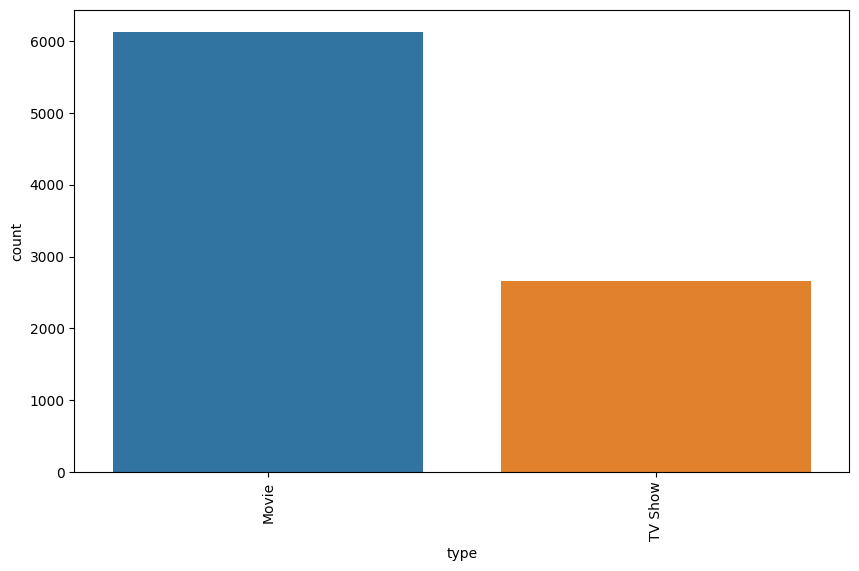

In [39]:
# Count of Tv vs Movie shows
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='type')
plt.xticks(rotation=90)
plt.show()

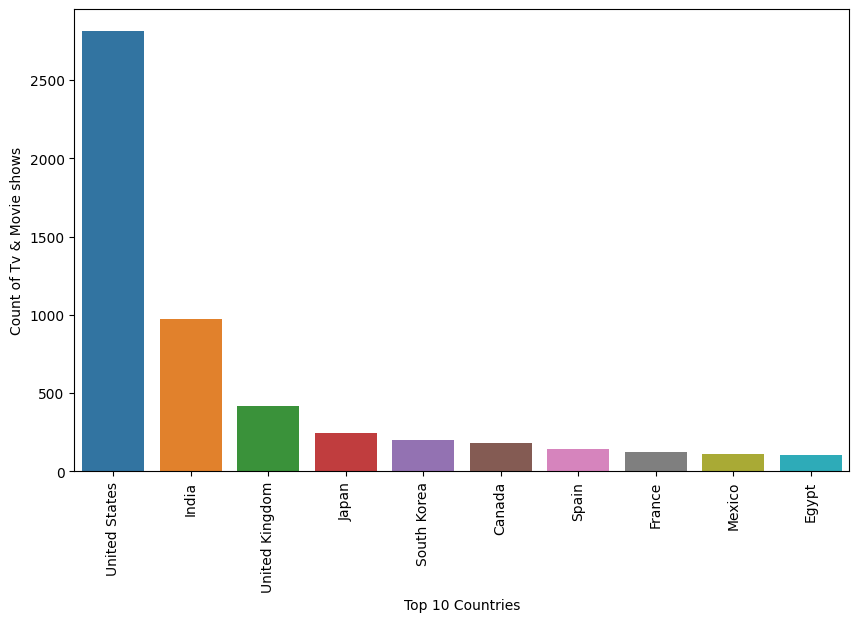

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

# Insight:


*   United States, India and UK are the top 3 countries where most of the movies and Tv shows are produced.




In [41]:
top_5_rating=df['rating'].value_counts().iloc[:5]

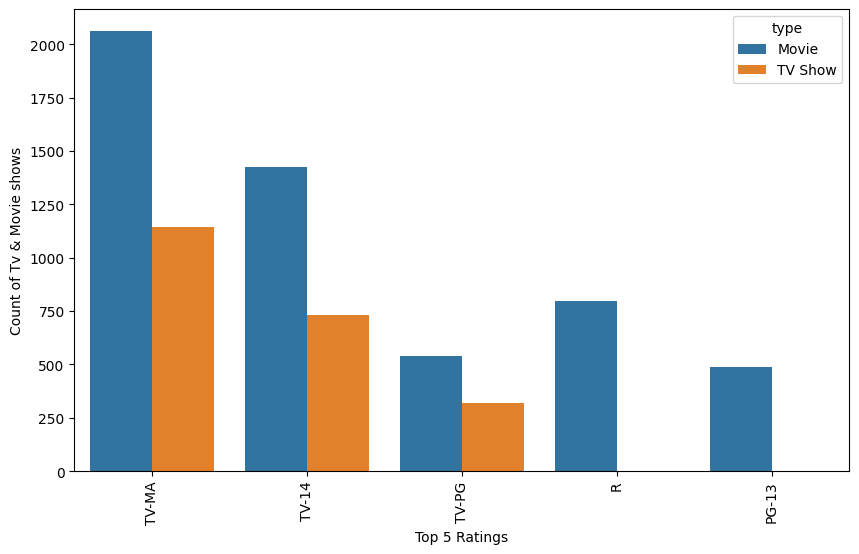

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['rating'].isin(top_5_rating.index)],x='rating',order=top_5_rating.index,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Top 5 Ratings')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

# Insights:
  

*   Most Netflix shows are rated for mature audiences, like TV-MA, TV-14, and TV-PG.
*   These ratings signal that the content might have strong language, violence, or adult themes.

*   TV-14 has mild violence and some mature themes, while TV-PG might have moderate violence and suggestive content.






In [43]:
top_10_directors=df[df['director']!='unknown director']['director'].value_counts().sort_values(ascending=False).iloc[:10]

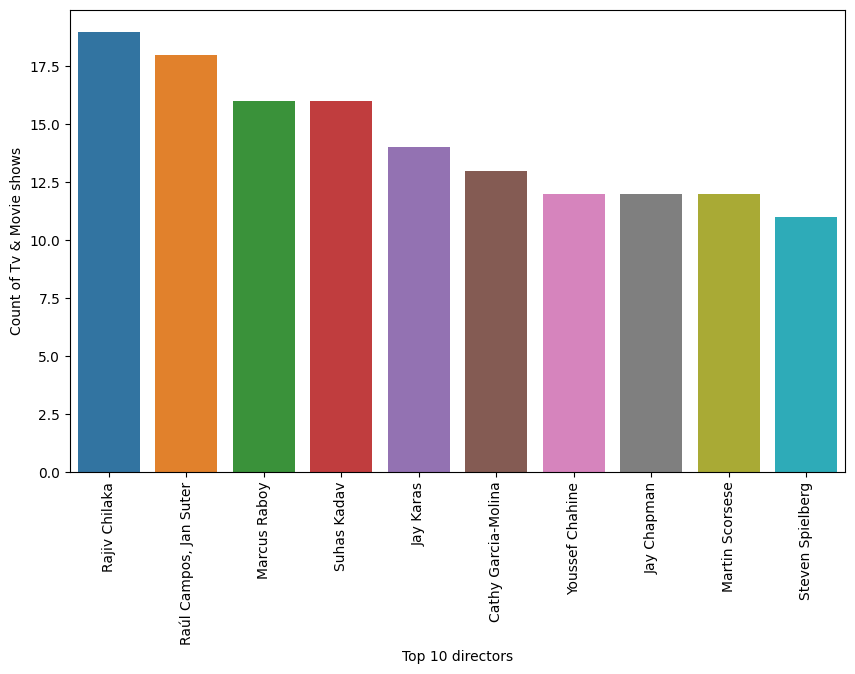

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['director'].isin(top_10_directors.index)],x='director',order=top_10_directors.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 directors')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

In [45]:
top_10_year=df['release_year'].value_counts().sort_values(ascending=False).iloc[:10]
top_10_year

release_year
2018    1146
2017    1032
2019    1030
2020     953
2016     901
2021     592
2015     558
2014     352
2013     287
2012     236
Name: count, dtype: int64

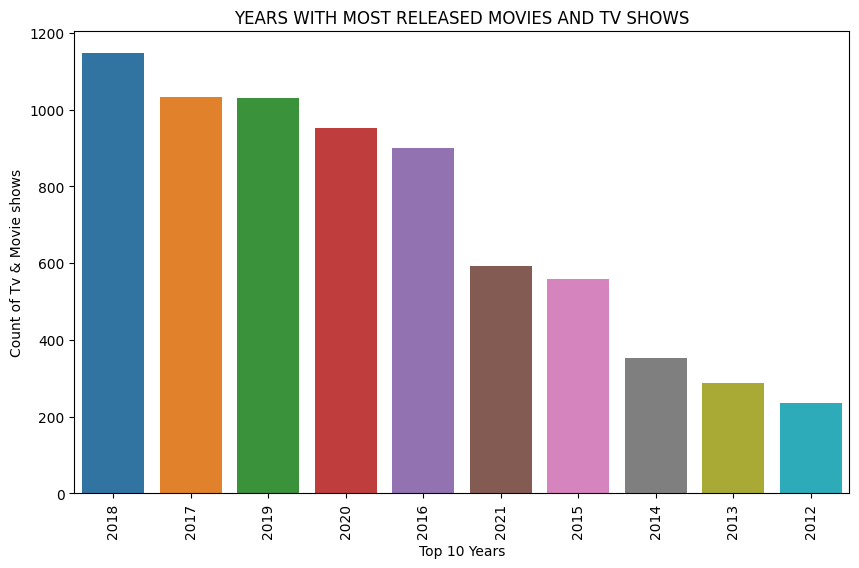

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['release_year'].isin(top_10_year.index)],x='release_year',order=top_10_year.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Years')
plt.ylabel('Count of Tv & Movie shows')
plt.title('YEARS WITH MOST RELEASED MOVIES AND TV SHOWS')
plt.show()

#Insights:


*   Most movies and TV Shows in Netflix has released recently in the years between 2016-21.




# Comparison of Tv shows vs. Movies

In [47]:
top_10_country_movies=df_cleaned[df_cleaned['type']=='Movie'].groupby('country').aggregate({'title':'count'}).reset_index().sort_values(by='title',ascending=False).rename(columns={'title':'Count of Movies'}).iloc[:10]
top_10_country_movies

,country,Count of Movies
525,United States,2058
218,India,893
440,United Kingdom,206
50,Canada,122
384,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
428,Turkey,76
278,Japan,76


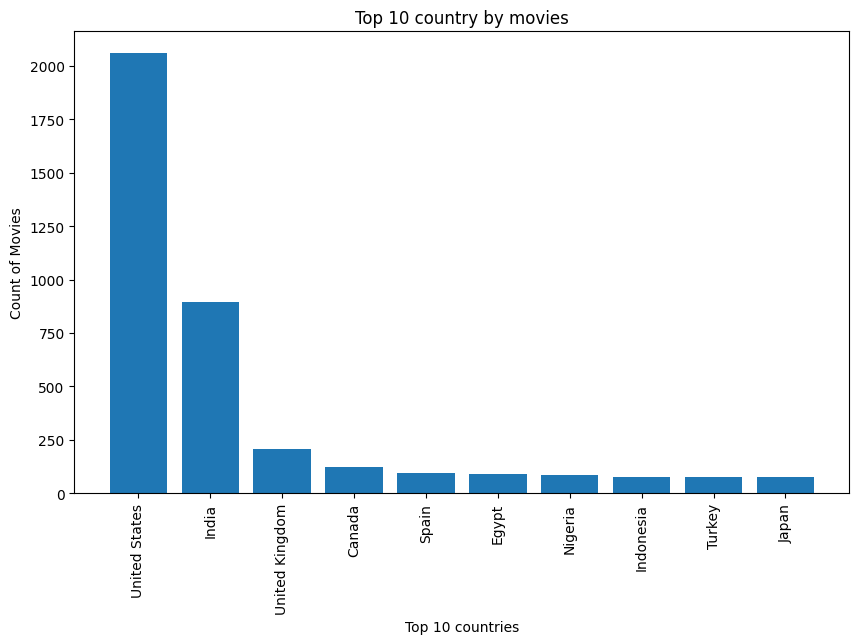

In [48]:
plt.figure(figsize=(10,6))
plt.bar(x=top_10_country_movies['country'],height=top_10_country_movies['Count of Movies'])
plt.xticks(rotation=90)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Movies')
plt.title('Top 10 country by movies')
plt.show()

#Insight:


*  The United States, India, and the UK stand as the primary three countries producing the highest quantity of Netflix movies.




In [49]:
top_10_country_Tv_show=df_cleaned[df_cleaned['type']=='TV Show'].groupby('country')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_country_Tv_show

country
United States     754
United Kingdom    212
Japan             168
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          47
Name: title, dtype: int64

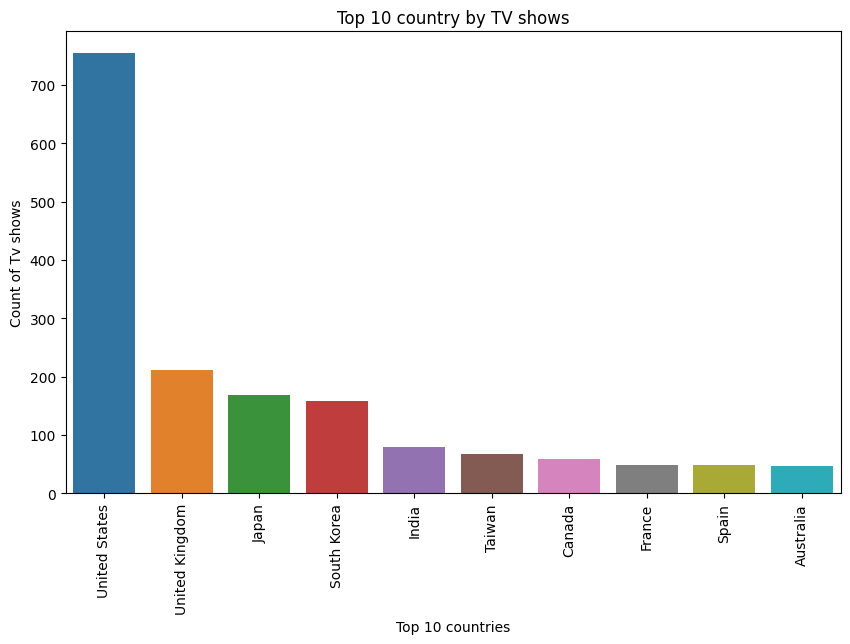

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_country_Tv_show.index,y=top_10_country_Tv_show.values,order=top_10_country_Tv_show.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Tv shows')
plt.title('Top 10 country by TV shows')
plt.show()

Insights:


*  United States , Uk, Japan and South korea are the top 4 producers of TV Shows in Netflix.
*   India produces less number of Tv shows relative to movies in Netflix



# TOP 10 COUNTRIES: Movies vs TV Shows

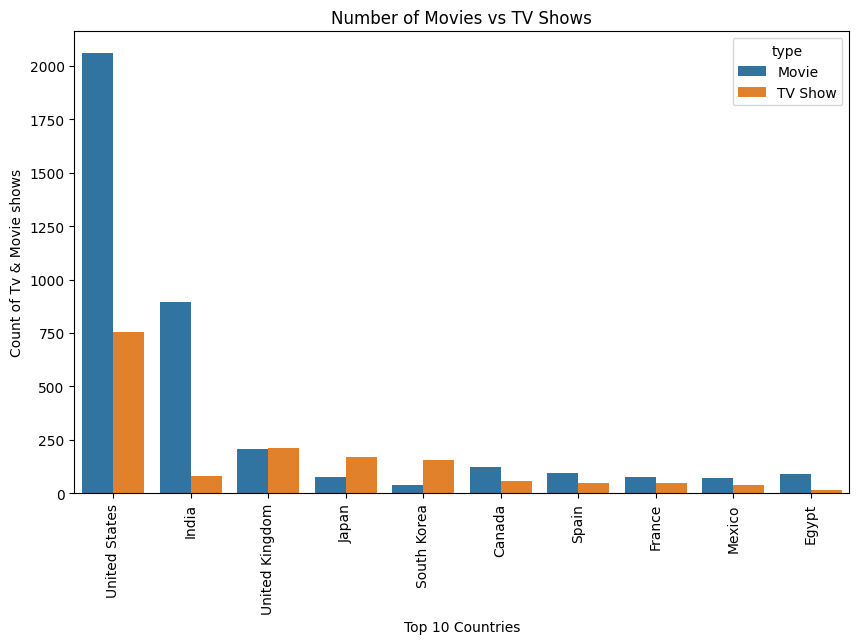

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.title('Number of Movies vs TV Shows')
plt.show()

## Best week to launch a TV show?

In [52]:
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')

In [53]:
df['week_added'] = df['date_added'].dt.isocalendar().week

In [54]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,week_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",38
1,TV Show,Blood & Water,unknown director,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",38
2,TV Show,Ganglands,Julien Leclercq,unknown country,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,38
3,TV Show,Jailbirds New Orleans,unknown director,unknown country,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",38
4,TV Show,Kota Factory,unknown director,India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,38


In [55]:
top_10_weeks_TV_show=df[df['type']=='TV Show'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_weeks_TV_show)

week_added
27    85
31    79
24    75
35    73
13    73
40    69
26    69
5     68
44    67
37    67
Name: title, dtype: int64


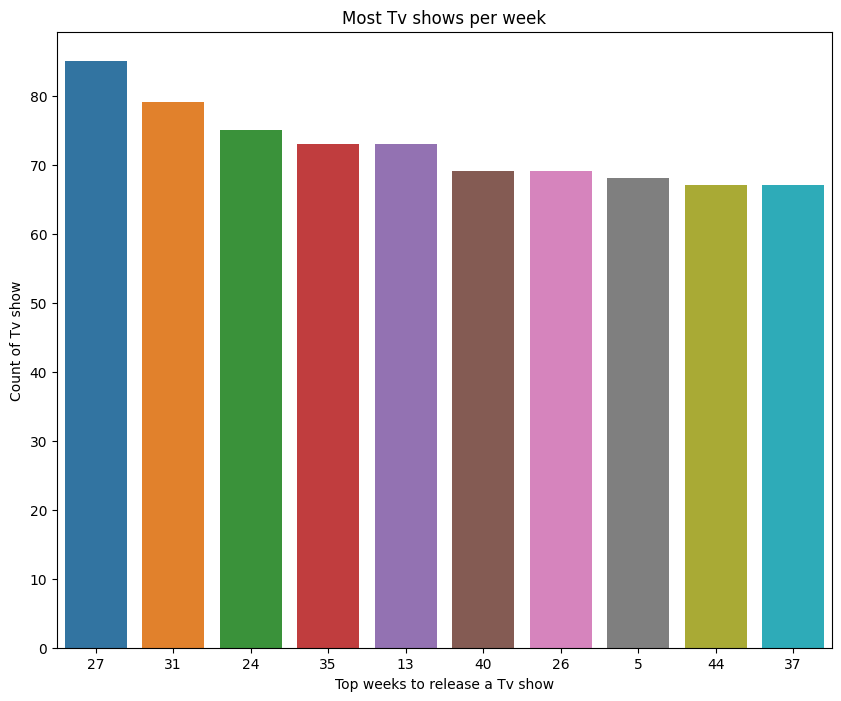

In [56]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_weeks_TV_show.index,y=top_10_weeks_TV_show.values,order=top_10_weeks_TV_show.index)
plt.xlabel('Top weeks to release a Tv show')
plt.ylabel('Count of Tv show')
plt.title('Most Tv shows per week')
plt.show()

#Insights


*   TV shows are notably added in weeks around late March/early April, mid-June, and both early and late July. Additionally, there's a significant addition of TV shows in late October/early November.
*   This pattern suggests that TV show releases have notable peaks in early summer, late summer, early fall, and late fall.



# Best week to launch a Movie?

In [57]:
top_10_weeks_Movies=df[df['type']=='Movie'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_weeks_Movies)

week_added
1     316
44    243
40    215
9     207
26    195
35    189
31    185
13    174
18    173
27    154
Name: title, dtype: int64


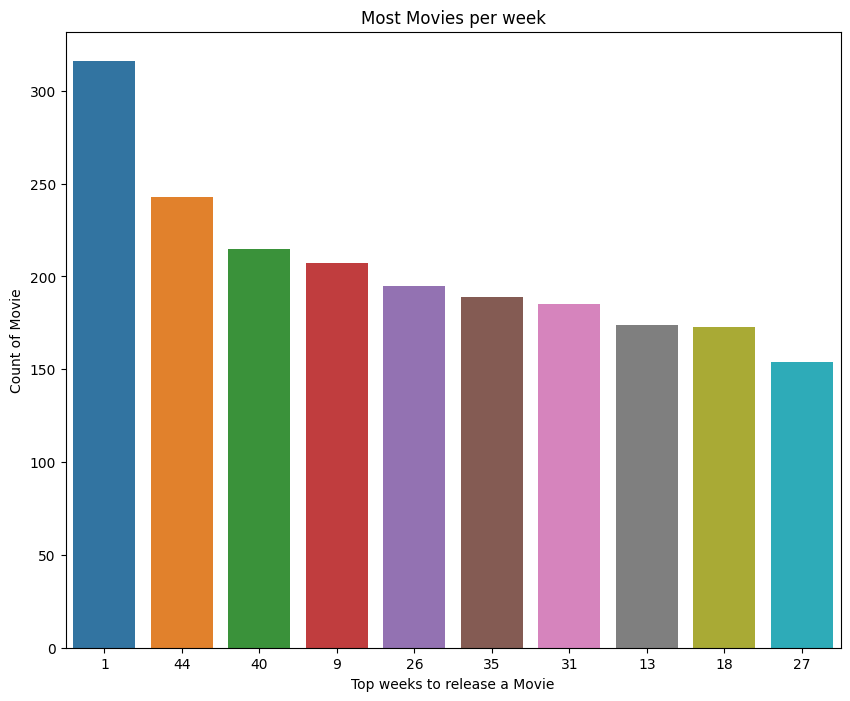

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_weeks_Movies.index,y=top_10_weeks_Movies.values,order=top_10_weeks_Movies.index)
plt.xlabel('Top weeks to release a Movie')
plt.ylabel('Count of Movie')
plt.title('Most Movies per week')
plt.show()

#Insights








*   Movies are prominently released in weeks falling in July, early October, late February to early March, late June to early July, and late August to early September.
*   This pattern suggests that movie production peaks around the beginning of summer, early fall, and late winter/early spring periods.



#Best month to launch a Movie?

In [59]:
df['month_added']=df['date_added'].dt.month_name()
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",38,September
1,TV Show,Blood & Water,unknown director,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",38,September
2,TV Show,Ganglands,Julien Leclercq,unknown country,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,38,September
3,TV Show,Jailbirds New Orleans,unknown director,unknown country,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",38,September
4,TV Show,Kota Factory,unknown director,India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,38,September


In [60]:
top_5_months_movies=df[df['type']=='Movie'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_movies)

month_added
July        565
April       550
December    547
January     546
October     545
Name: title, dtype: int64


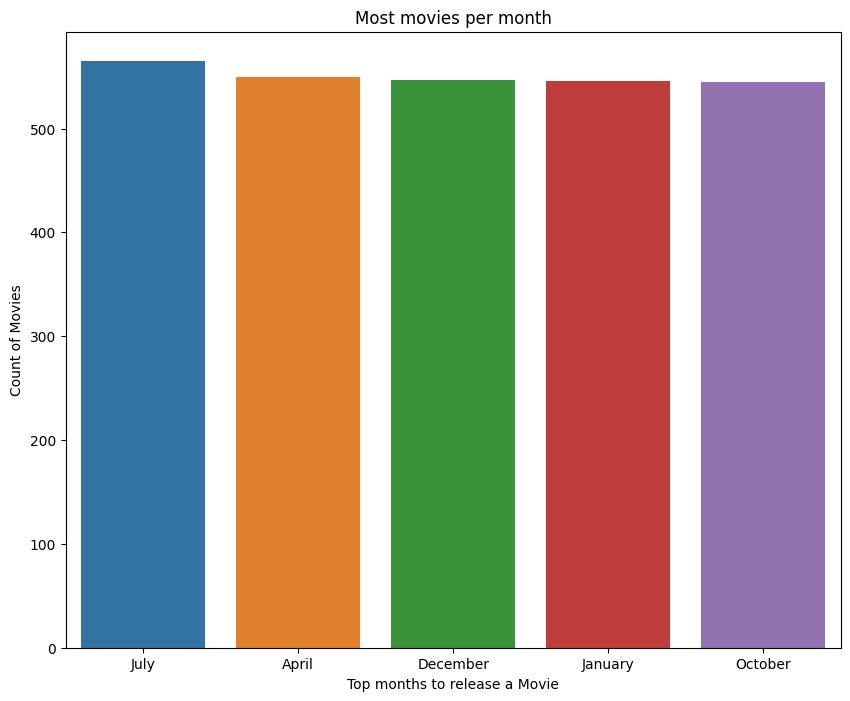

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_5_months_movies.index,y=top_5_months_movies.values,order=top_5_months_movies.index)
plt.xlabel('Top months to release a Movie')
plt.ylabel('Count of Movies')
plt.title('Most movies per month')
plt.show()

Insights:

*   The months with the most movie additions on Netflix are July and April, indicating that summer tends to be a popular time for releases.




*   In summer people have more leisure time, school vacations encourage family outings, the pleasant weather in western countries like US & UK attracts indoor activities, and international holiday periods widen the audience base.

*   Additionally, December and January, around Christmas and New Year, also see a significant number of additions, likely due to the festive season, making it a good time for movie releases on Netflix.


*   In october also there is lot of festivities in India due to Diwali and Durga Puja.






#Best month to launch a TV Show?


In [62]:
top_5_months_Tv_shows=df[df['type']=='TV Show'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_Tv_shows)

month_added
July         254
December     250
September    246
June         232
August       230
Name: title, dtype: int64


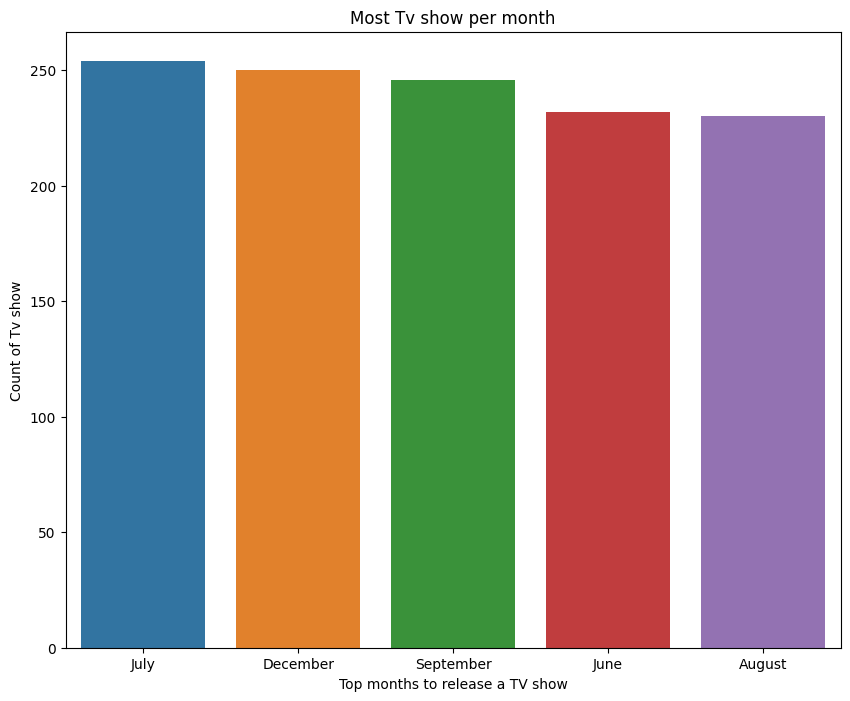

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_5_months_Tv_shows.index,y=top_5_months_Tv_shows.values,order=top_5_months_Tv_shows.index)
plt.xlabel('Top months to release a TV show')
plt.ylabel('Count of Tv show')
plt.title('Most Tv show per month')
plt.show()

Insights:


*   Most number of Tv shows are produced in the month of December mostly because of christmas festivities.
*   Also summer months like June to August are quite popular to release a TV show in netflix.



# Analysis of actors/directors of different types of shows/movies

## Top 10 actors who have appeared in most movies

In [64]:
df_cast['cast']=df_cast['cast'].str.strip()

In [65]:
top_10_actor_movie=df_cast[(df_cast['type']=='Movie')&(df_cast['cast']!='unknown cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_actor_movie

cast
Anupam Kher         117
Shah Rukh Khan       99
Naseeruddin Shah     92
Akshay Kumar         85
Paresh Rawal         79
Om Puri              78
Amitabh Bachchan     76
Boman Irani          72
Kareena Kapoor       67
Salman Khan          59
Name: title, dtype: int64

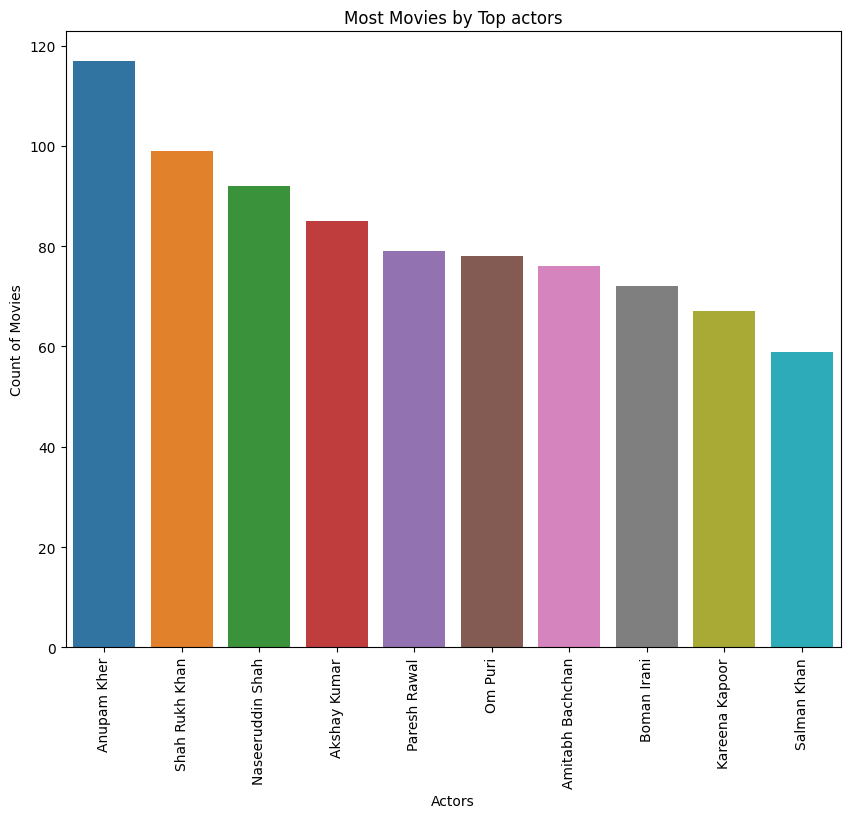

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_actor_movie.index,y=top_10_actor_movie.values,order=top_10_actor_movie.index)
plt.xlabel('Actors')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Top actors')
plt.xticks(rotation=90)
plt.show()

#Insights:

*   Anupam, SRK, Akshay Kumar, and Naseeruddin are among the top four actors who have appeared in the highest number of movies on Netflix.
*  
All the Indian actors hold the record for the highest number of appearances in movies.



## Top 10 actors who have appeared in most TV SHOWS

In [67]:
top_10_actor_Tv_show=df_cast[(df_cast['type']=='TV Show')&(df_cast['cast']!='unknown cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_actor_Tv_show

cast
Takahiro Sakurai      55
Yuki Kaji             44
David Attenborough    41
Ai Kayano             39
Junichi Suwabe        38
Yuichi Nakamura       38
Daisuke Ono           37
Jun Fukuyama          36
Yoshimasa Hosoya      33
Hiroshi Kamiya        31
Name: title, dtype: int64

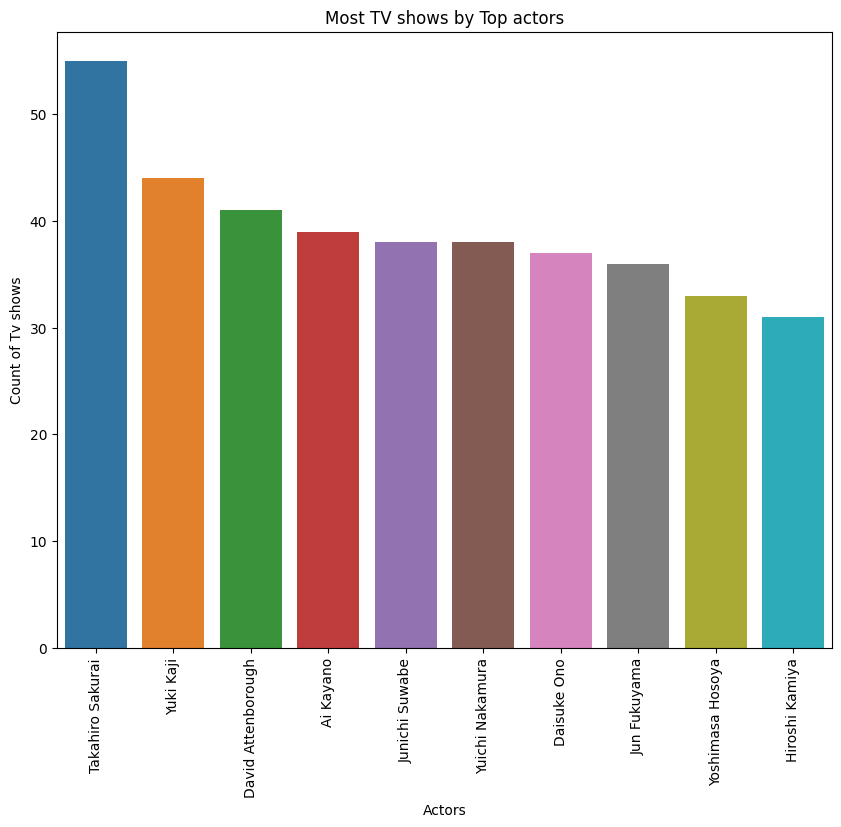

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_actor_Tv_show.index,y=top_10_actor_Tv_show.values,order=top_10_actor_Tv_show.index)
plt.xlabel('Actors')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Top actors')
plt.xticks(rotation=90)
plt.show()

#Insights:

*   Japanese actors such as Takahiro Sakurai, Yuki Kaji, and others listed have contributed significantly to movies or shows on Netflix, indicating a notable presence of Japanese talent in the platform's content.




## Top 10 directors who have appeared in most movies

In [69]:
top_10_director_movie=df[(df['type']=='Movie')&(df['director']!='unknown director')].groupby('director')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_director_movie

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: title, dtype: int64

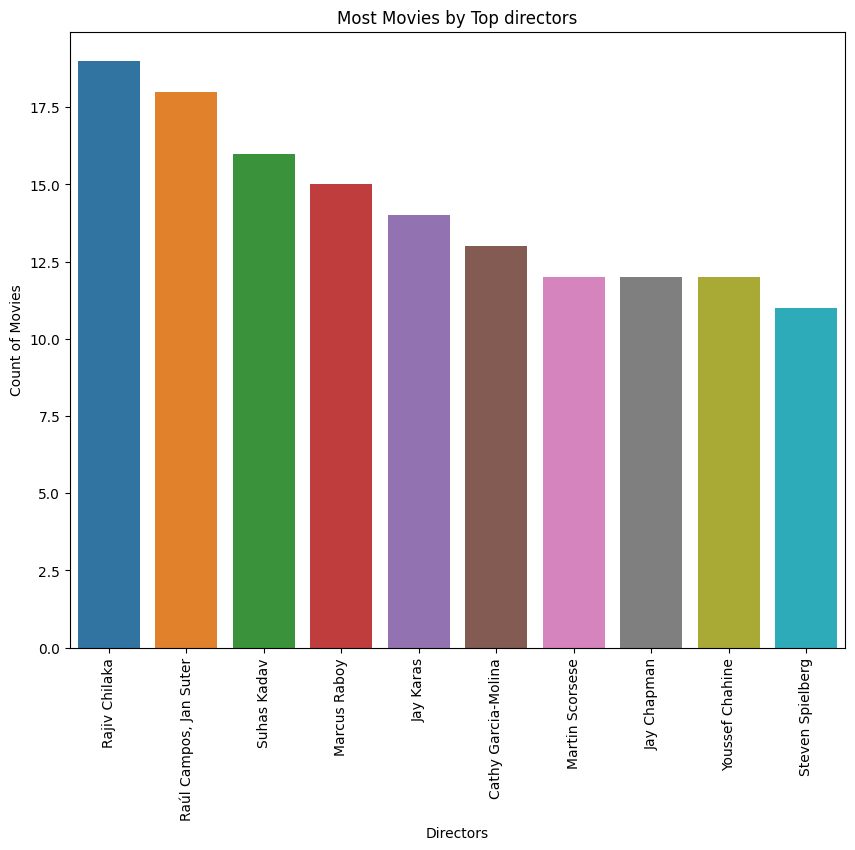

In [70]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_director_movie.index,y=top_10_director_movie.values,order=top_10_director_movie.index)
plt.xlabel('Directors')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Top directors')
plt.xticks(rotation=90)
plt.show()

## Top 10 directors who have appeared in most TV shows

In [71]:
top_10_director_Tv_show=df[(df['type']=='TV Show')&(df['director']!='unknown director')].groupby('director')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_director_Tv_show

director
Alastair Fothergill                                                      3
Stan Lathan                                                              2
Iginio Straffi                                                           2
Rob Seidenglanz                                                          2
Ken Burns                                                                2
Shin Won-ho                                                              2
Hsu Fu-chun                                                              2
Miguel Conde                                                             1
Mike Flanagan                                                            1
Norm Hiscock, Gary Howsam, Mike Smith, John Paul Tremblay, Robb Wells    1
Name: title, dtype: int64

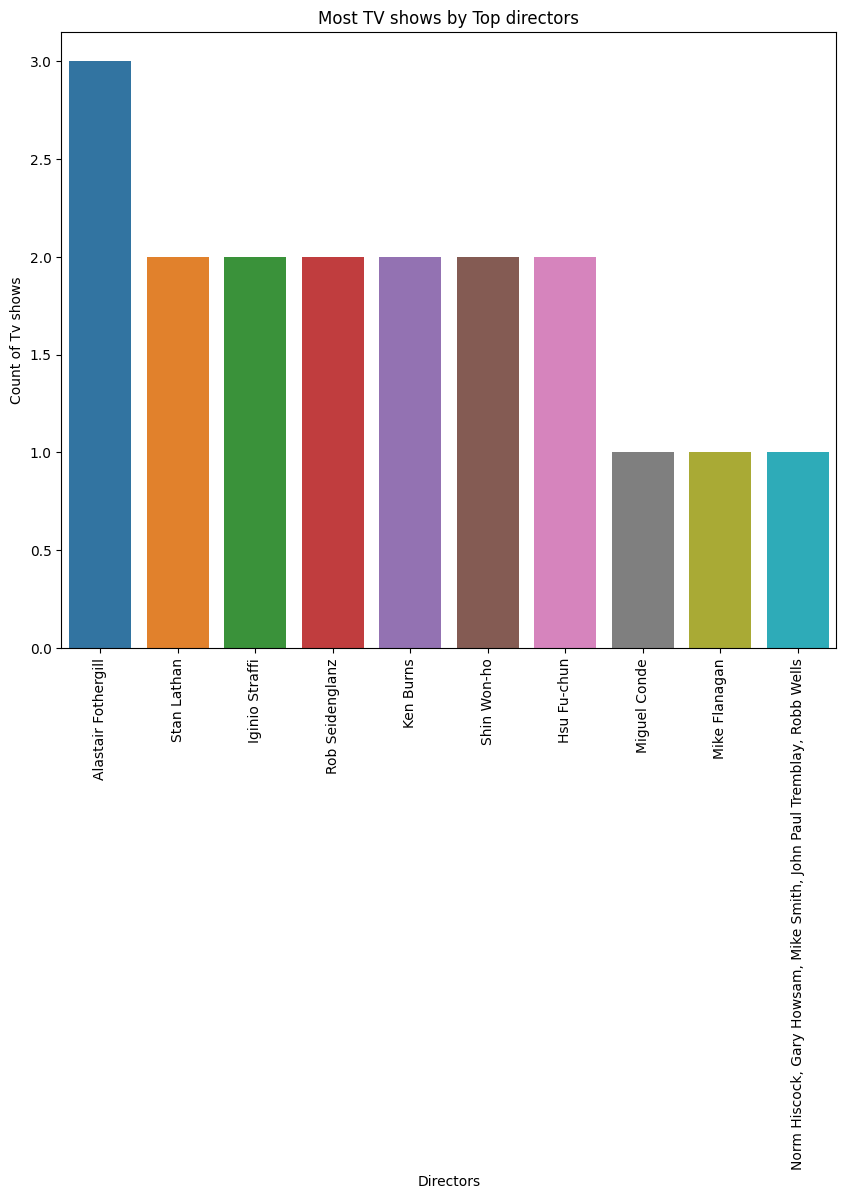

In [72]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_director_Tv_show.index,y=top_10_director_Tv_show.values,order=top_10_director_Tv_show.index)
plt.xlabel('Directors')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Top directors')
plt.xticks(rotation=90)
plt.show()

# Top genre movies which are more popular or produced more

In [73]:
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[unknown cast],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [74]:
#Trimming out the white spaces
df_unnested['listed_in']=df_unnested['listed_in'].str.strip()

In [75]:
df_unnested[df_unnested['type']=='Movie'].groupby('listed_in')['title'].count().sort_values(ascending=False)


listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Cult Movies                   71
Anime Features                71
Faith & Spirituality          65
Movies                        53
Name: title, dtype: int64

In [76]:
top_10_movie_genres=df_unnested[df_unnested['type']=='Movie']['listed_in'].value_counts().iloc[:10]

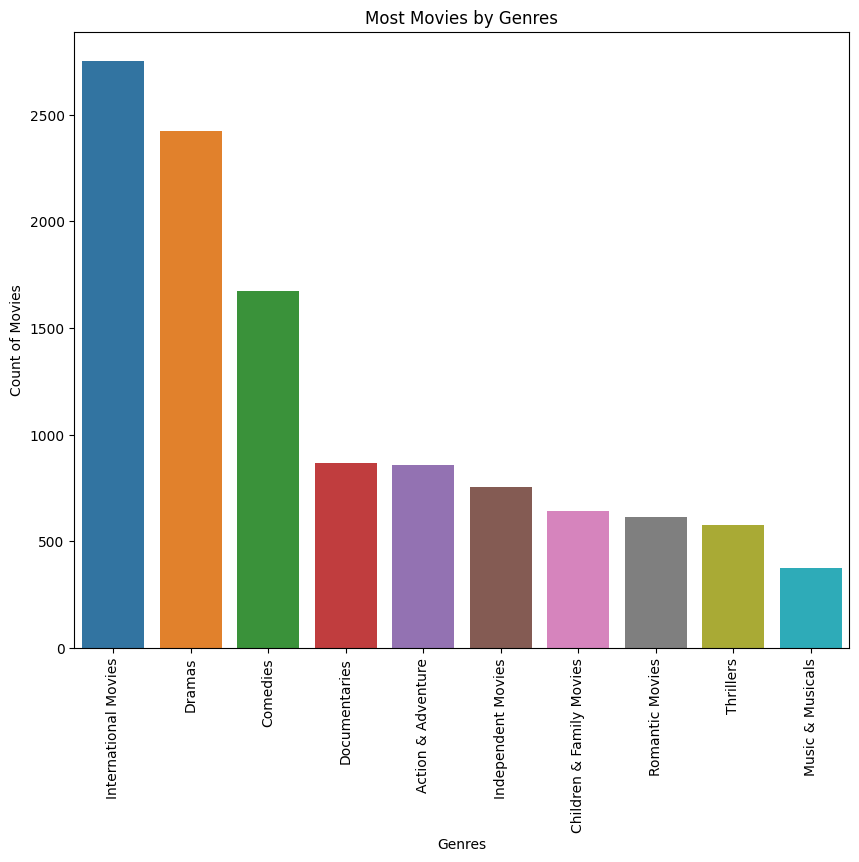

In [77]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_movie_genres.index,y=top_10_movie_genres.values,order=top_10_movie_genres.index)
plt.xlabel('Genres')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Genres')
plt.xticks(rotation=90)
plt.show()


*   Dramas ,comedies,Documentaries, Action & Adventures are the top Genres on which movies are produced.

*   Also a good number of movies are produced on Romance and Thriller Genre.



#Text preprocessing for Generating Word cloud for movies

In [78]:
df_movie_genres=df_unnested[df_unnested['type']=='Movie']
# Concatenate all genres into a single string
all_genres = ' '.join(df_movie_genres['listed_in'].apply(lambda x: x.replace(',', ' ')))


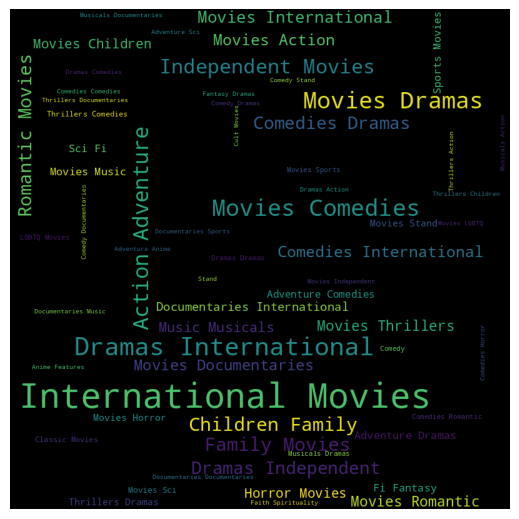

In [79]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='Black',
                min_font_size = 10).generate(all_genres)

# Display the word cloud using matplotlib
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#Text preprocessing for Generating Word cloud for TV Shows


In [80]:
df_tv_show_genres=df_unnested[df_unnested['type']=='TV Show']
# Concatenate all genres into a single string
all_genres_tv_show = ' '.join(df_tv_show_genres['listed_in'].apply(lambda x: x.replace(',', ' ')))


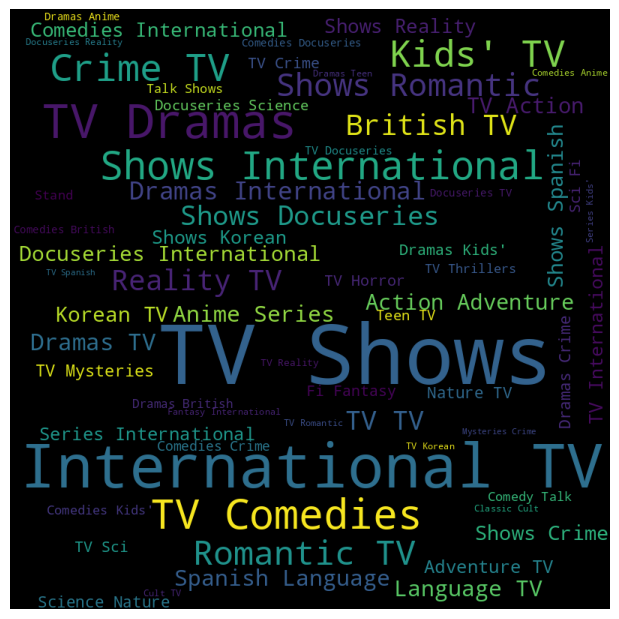

In [81]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(all_genres_tv_show)

# Display the word cloud using matplotlib
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [82]:
top_10_tv_show_genres=df_unnested[df_unnested['type']=='TV Show']['listed_in'].value_counts().iloc[:10]

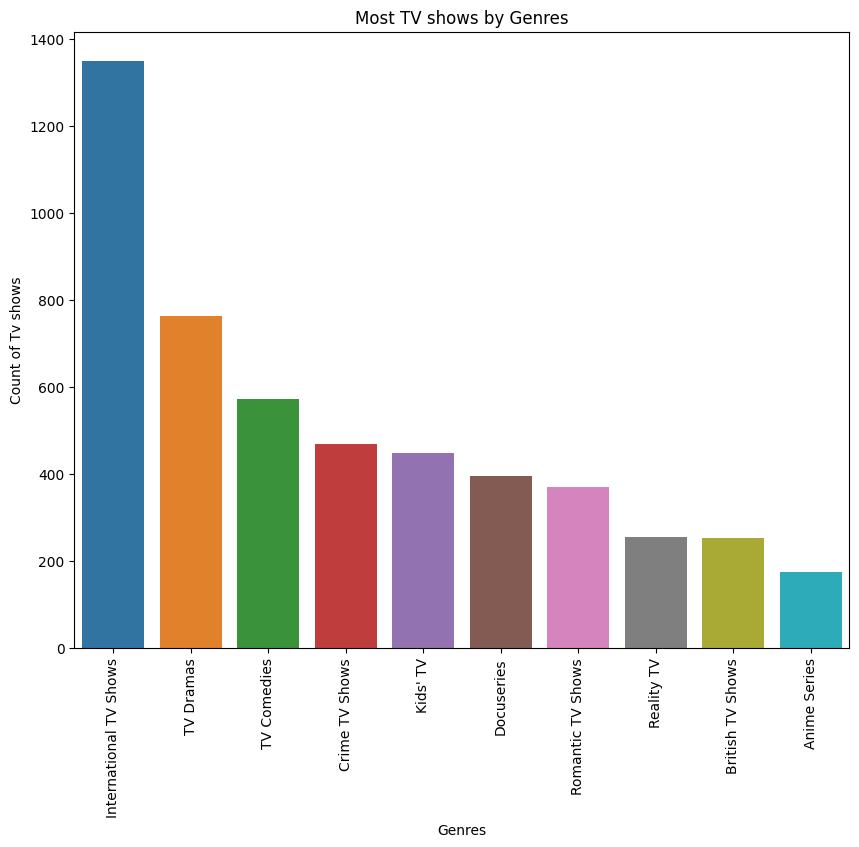

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_tv_show_genres.index,y=top_10_tv_show_genres.values,order=top_10_tv_show_genres.index)
plt.xlabel('Genres')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Genres')
plt.xticks(rotation=90)
plt.show()

Insights

*   Most Tv shows are produced in the Dramas, Comedies, Crime and Kids genre.




# After how many days the movie will be added to Netflix after the release of the movie

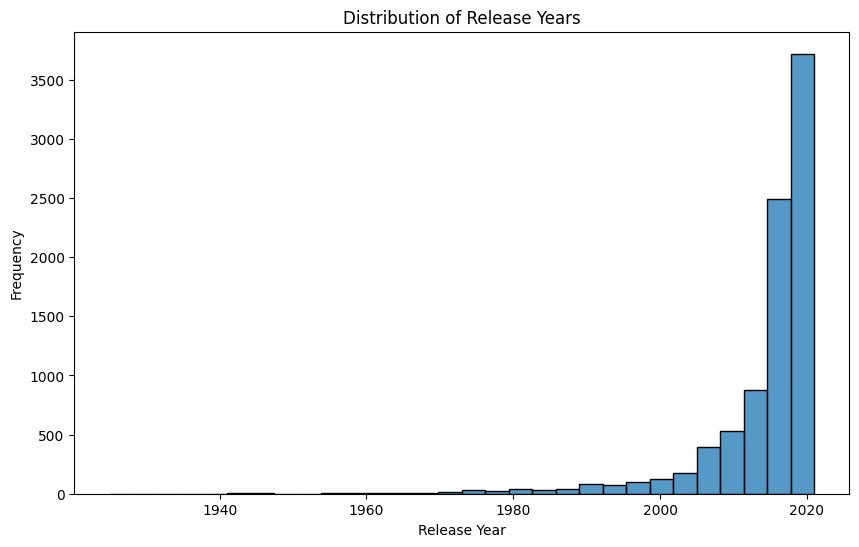

In [84]:
# Plot the distribution of release years
plt.figure(figsize=(10, 6))
plt.title('Distribution of Release Years')
sns.histplot(df['release_year'], bins=30, kde=False)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

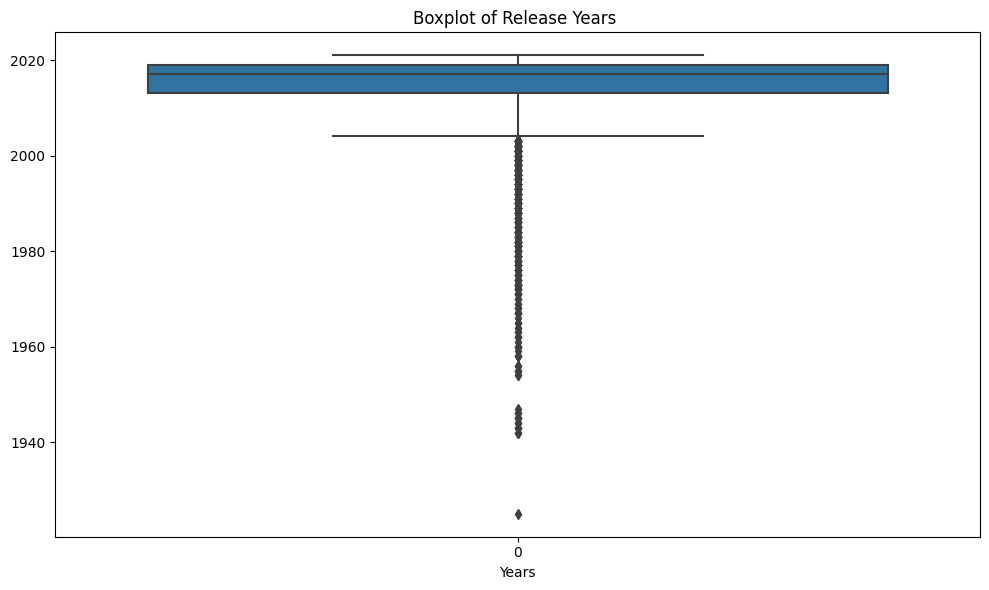

In [85]:
# Plot a boxplot of the days to add movies
plt.figure(figsize=(10, 6))
sns.boxplot(df['release_year'])
plt.title('Boxplot of Release Years ')
plt.xlabel('Years')
plt.tight_layout()
plt.show()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8797 non-null   object        
 1   title         8797 non-null   object        
 2   director      8797 non-null   object        
 3   country       8797 non-null   object        
 4   date_added    8709 non-null   datetime64[ns]
 5   release_year  8797 non-null   int64         
 6   rating        8797 non-null   object        
 7   duration      8797 non-null   object        
 8   listed_in     8797 non-null   object        
 9   description   8797 non-null   object        
 10  week_added    8709 non-null   UInt32        
 11  month_added   8709 non-null   object        
dtypes: UInt32(1), datetime64[ns](1), int64(1), object(9)
memory usage: 1.1+ MB


In [87]:
df['release_year']=pd.to_datetime(df['release_year'],format='%Y')
df['days_to_add']=df['date_added']-df['release_year']

In [88]:
df['days_to_add'].mode()

0   334 days
Name: days_to_add, dtype: timedelta64[ns]

# Insights:


*   After release it will take approximately 334 days to be added in Netflix for most of the Movies/Tv shows.




#Another Approach in years

In [89]:
# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['release_year1'] = df['release_year'].dt.year

# Calculate the difference in days between the year added and release year
df['years_to_add'] = (df['year_added'] - df['release_year1'])

# Calculate the mode of the 'days_to_add'
mode_years_to_add = df['years_to_add'].mode()[0]
mode_years_to_add

0.0

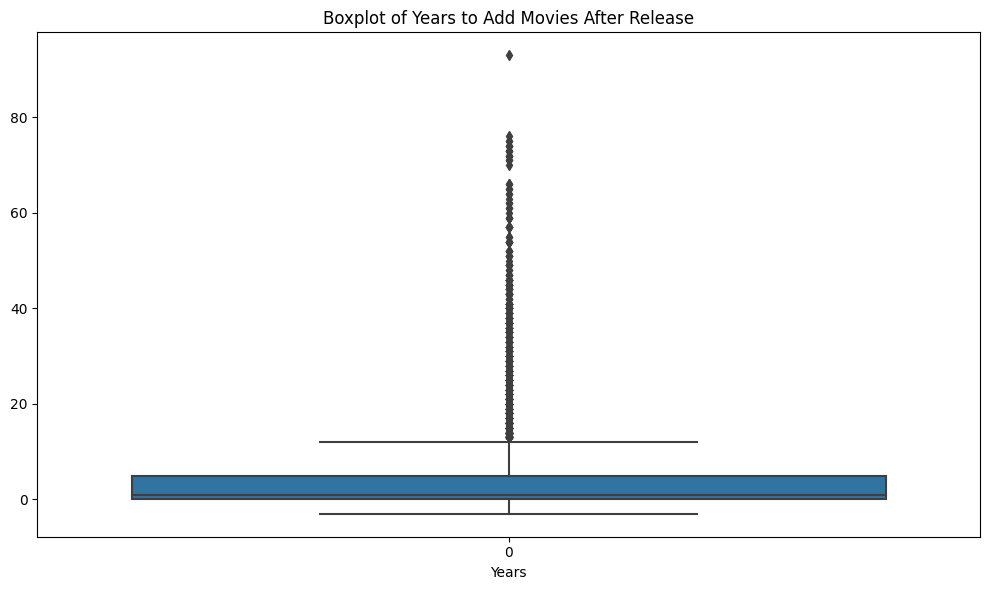

In [90]:
# Plot a boxplot of the days to add movies
plt.figure(figsize=(10, 6))
sns.boxplot(df['years_to_add'])
plt.title('Boxplot of Years to Add Movies After Release')
plt.xlabel('Years')
plt.tight_layout()
plt.show()

#Insight:
Since there are a lot of unusual values/ outliers in the Years to Add data, using the average might not show the typical value well. It's better to use the middle value (median) or the one that appears the most (mode) to understand what's usual.

In [91]:
print('Mode of No. of years to add after release:',df['years_to_add'].mode()[0])
print('Median of No. of years to add after release:',df['years_to_add'].median())

Mode of No. of years to add after release: 0.0
Median of No. of years to add after release: 1.0




*   So most of the movies are added to netflix approximately within 1 years which is consistent with our previous analysis in days.




#Summarized Recommendations:

1.   Most content on Netflix is rated for adults (TV-MA), indicating a liking for mature, violent, and sexual content. To grow its audience, Netflix could focus more on kid-friendly contents to increase it's customer base.

2.   Best Times to Release:
Holidays, especially from November to January, and during the summer in June are great times to launch new content on Netflix.


3.   Popular Genres:
Drama, comedy, crime, action, and adventure are the most liked genres. Netflix should create more movies and shows in these categories.

4. Japanese Actors and TV Shows: Japanese actors are well-liked in Netflix TV shows, particularly in the US, UK, Japan, and South Korea.



5.   Indian Actors and Movies:Indian actors have starred in the most Netflix movies, showing that Netflix movies are quite popular in India.


*   Simplified Summary:

Adult-rated content is popular, more kid-friendly content can increase it's customer base; releasing during holidays and summer works best. Dramas, comedies, crimes, actions, and adventures are loved genres. Indian actors dominate movies, and Japanese actors shine in TV shows on Netflix.




## THANK YOU! HAPPY CODING!!
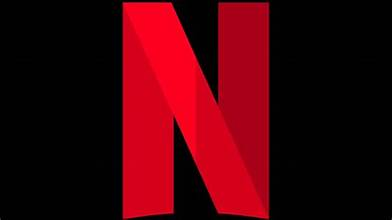